In [58]:
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [55]:
def _normalize_channel(channel):
    norm = 255/channel.max()
    return (channel * norm).astype(int)

def white_patch(img, channel_count = 3):
    img_c = img.copy()
    channel_idx = 0
    for channel_idx in range(channel_count):
        img_c[:,:,channel_idx] = _normalize_channel(img[:,:,channel_idx])
    return img_c


(<Figure size 640x480 with 16 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

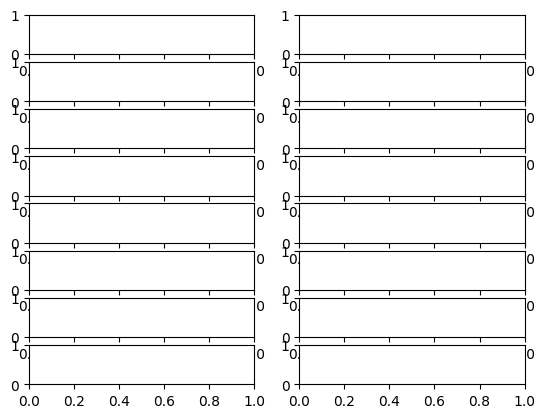

In [71]:
plt.subplots(nrows=len(images), ncols=2)

/tmp/ipykernel_2789422/2297550399.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


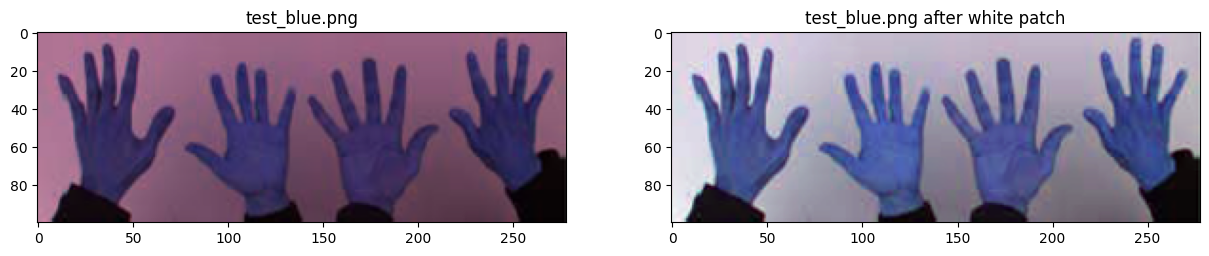

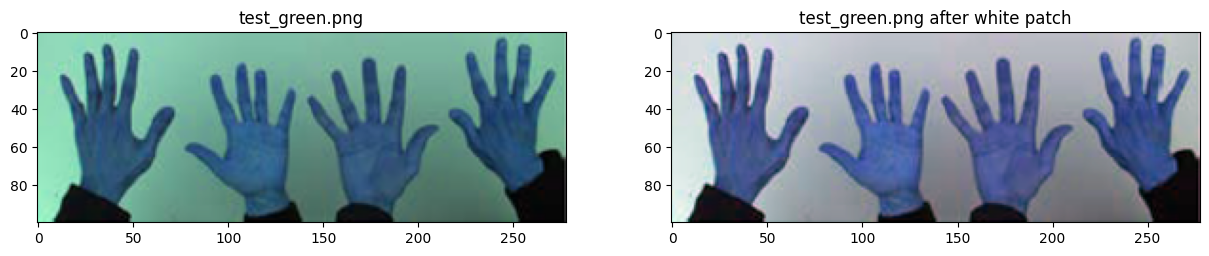

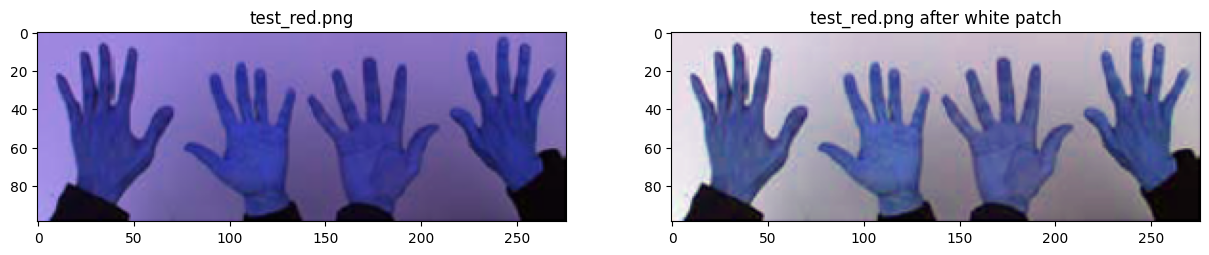

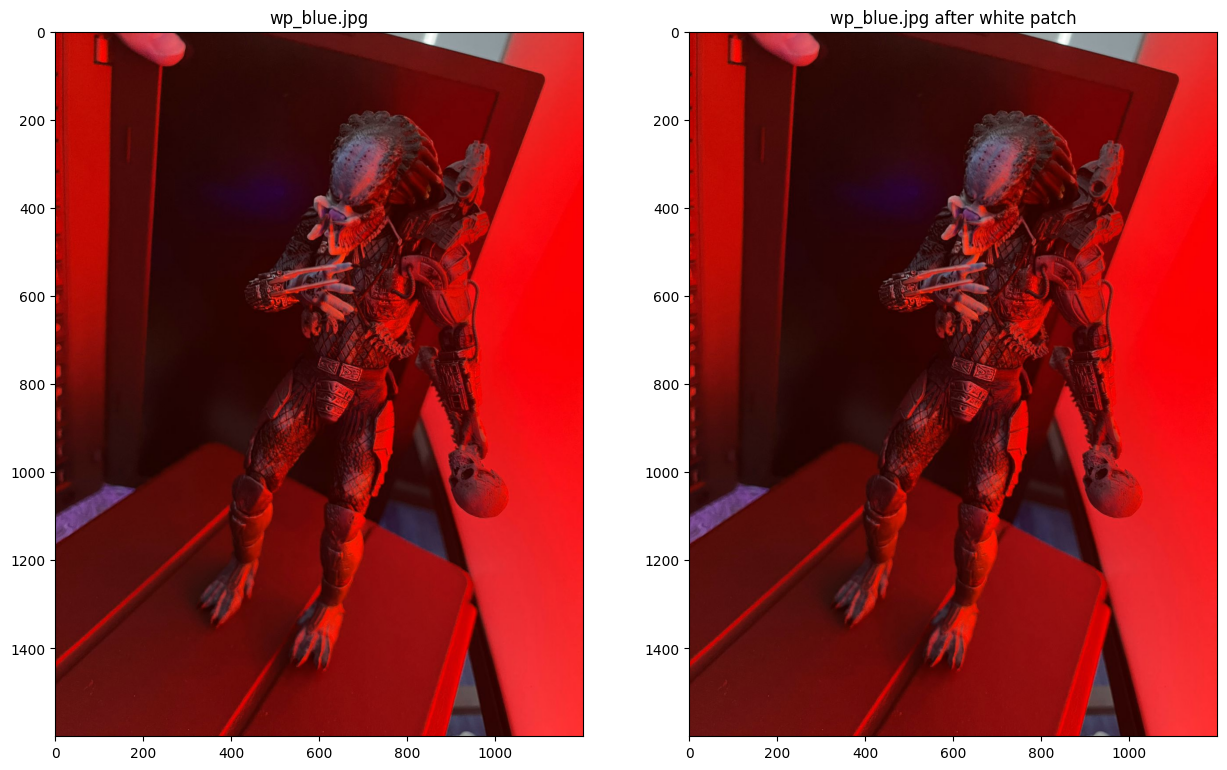

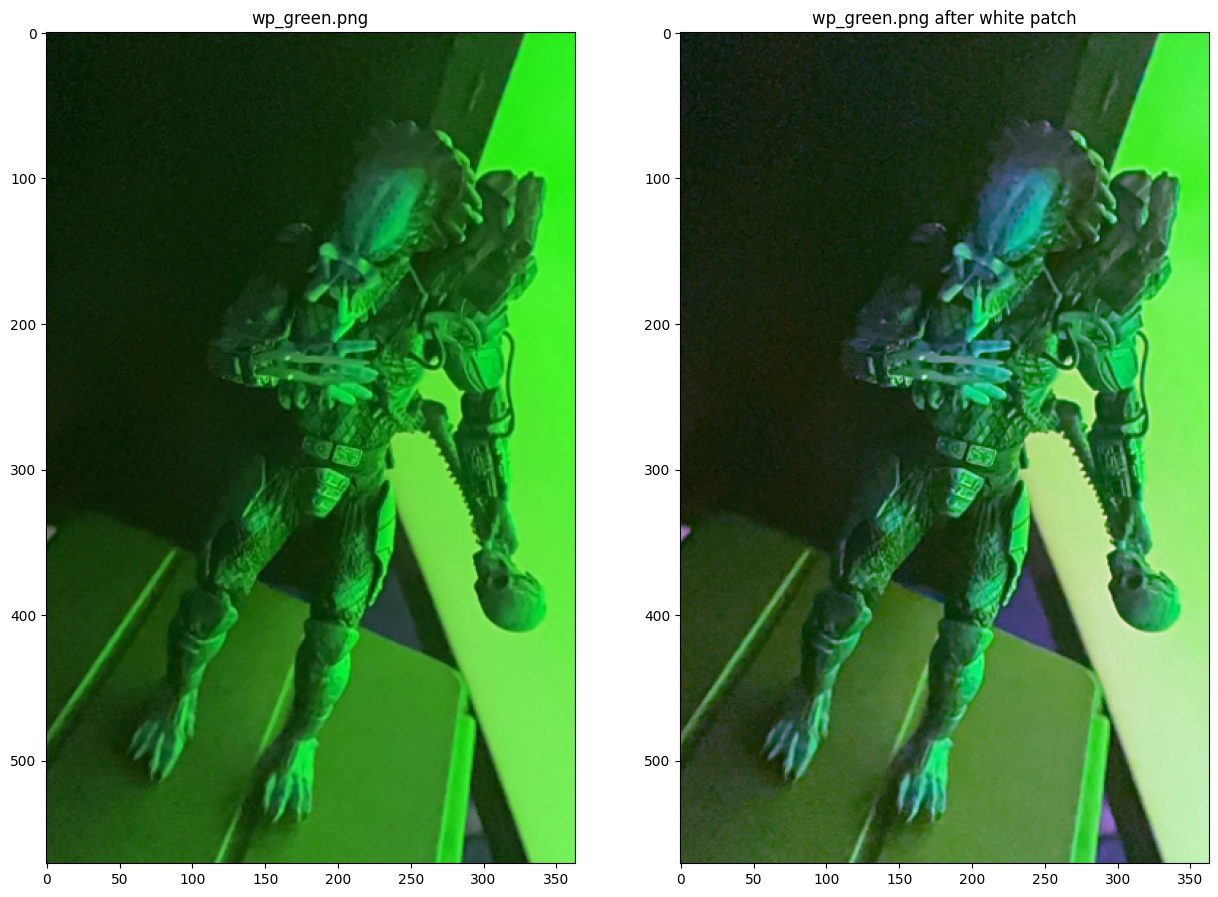

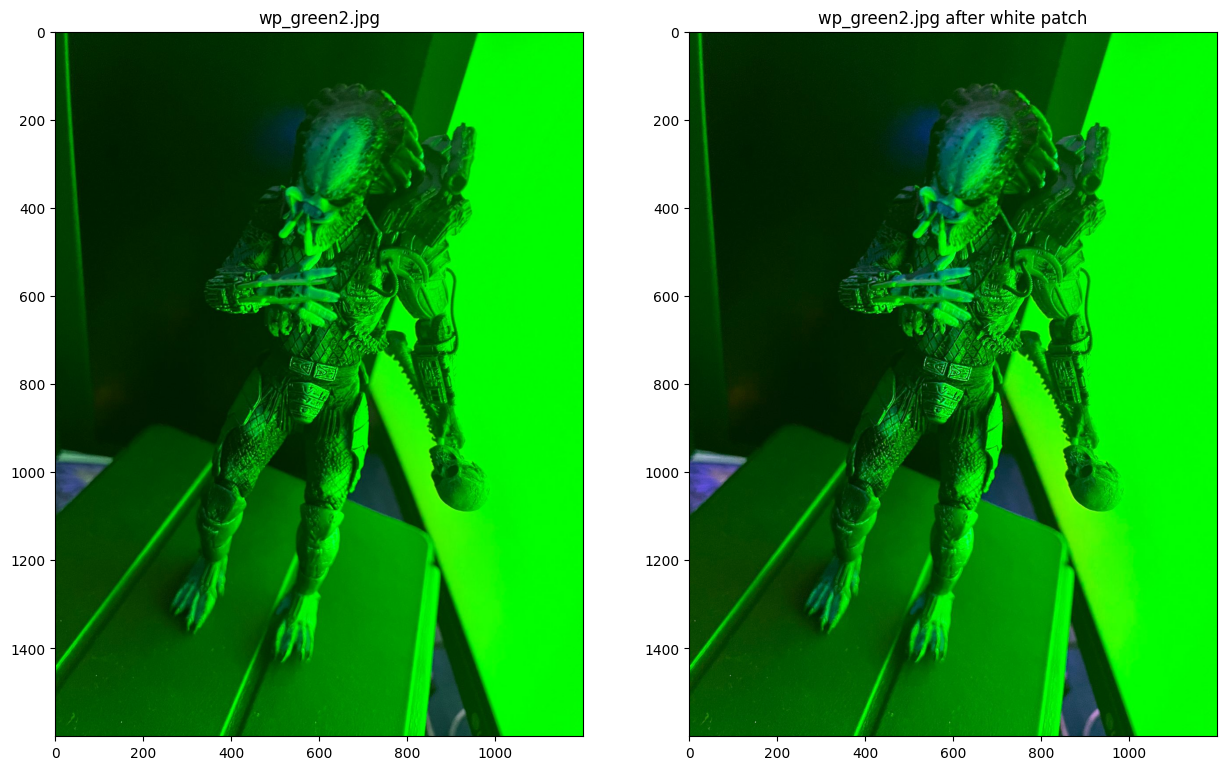

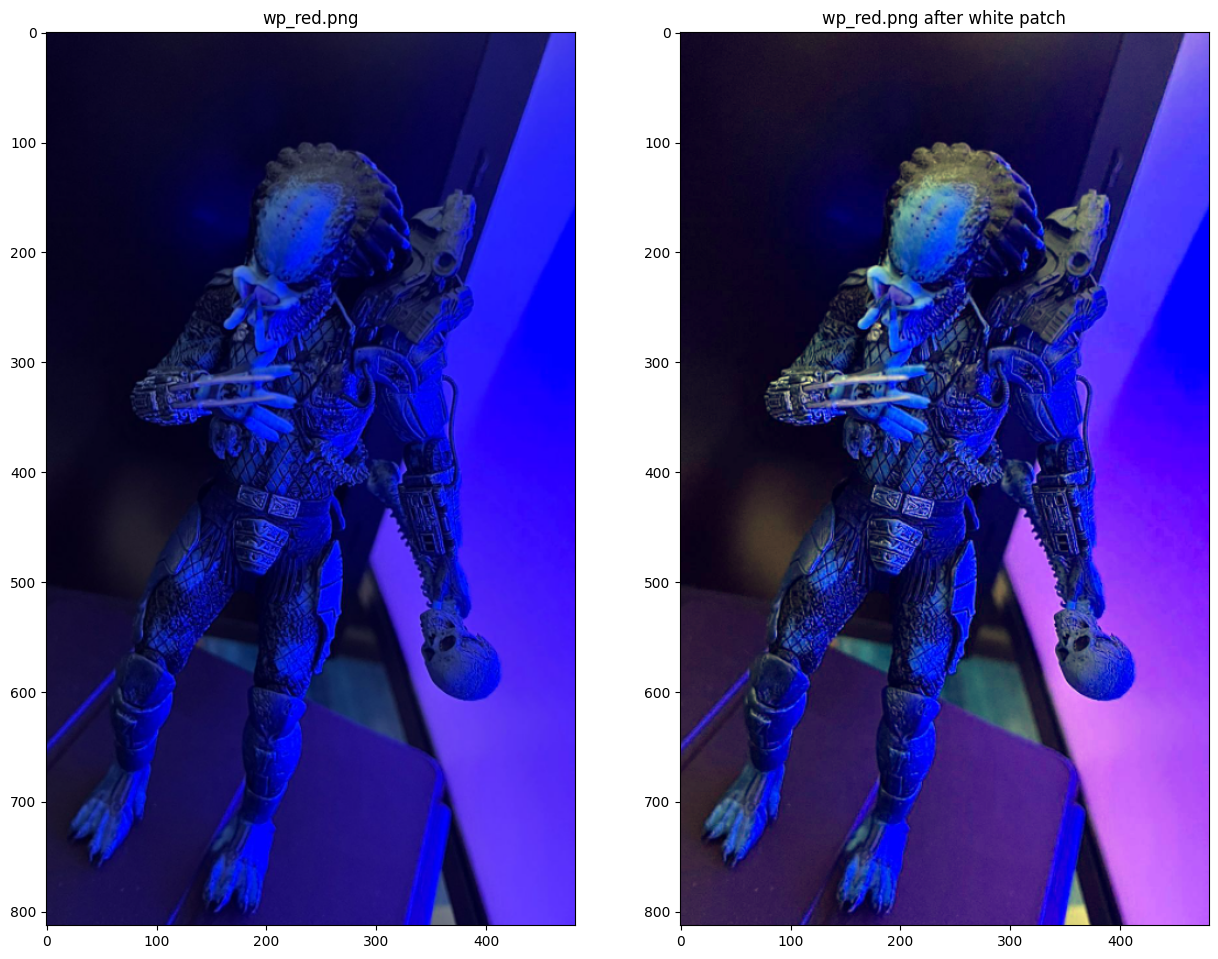

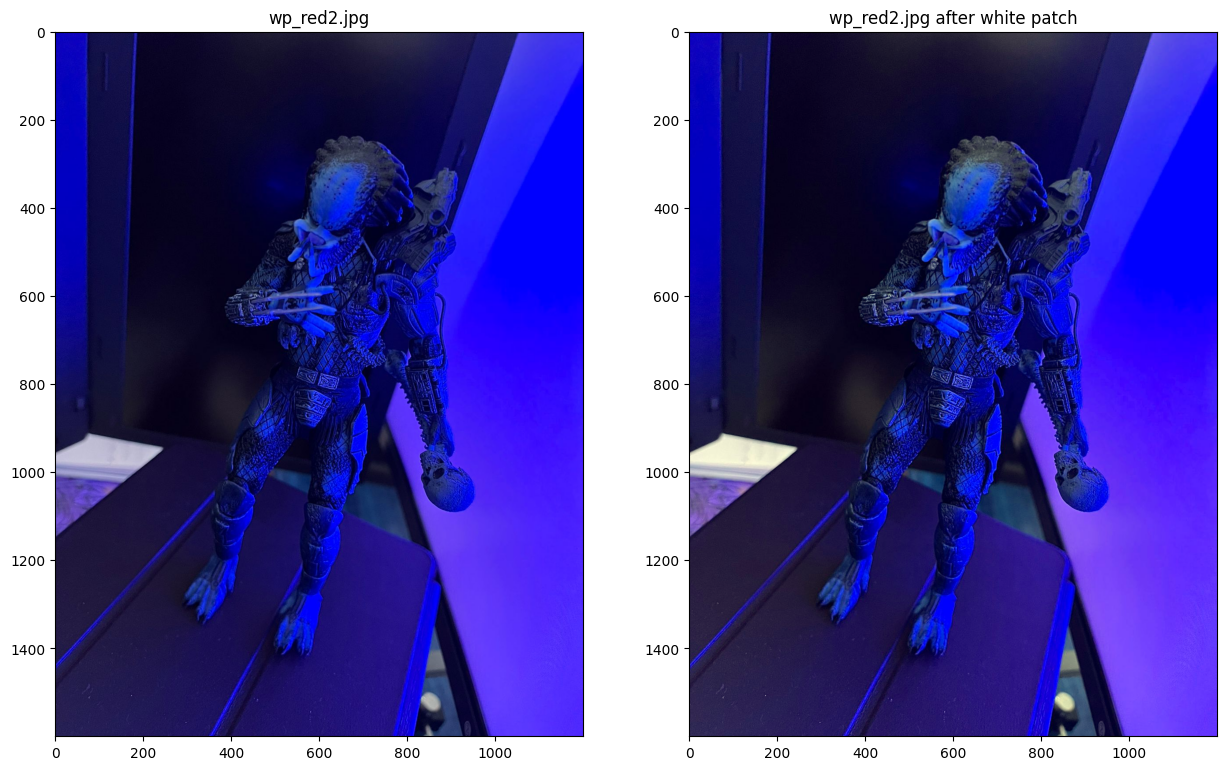

In [87]:
images = os.listdir('./TP1/white_patch')
# fig, ax = plt.subplots(nrows=len(images), ncols=2, figsize=(15,15))

for idx, img_path in enumerate(images):
    img = cv.imread('./TP1/white_patch/' + img_path)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
    ax[0].imshow(img)
    ax[0].set_title(img_path)
    ax[1].imshow(white_patch(img))
    ax[1].set_title(f"{img_path} after white patch")
    fig.show()


# Parte II

Como sabemos el algoritmo de white patch no es mas que una normalizacion por canal. Con lo cual si el valor maximo de un canal es 255, el algoritmo no tendra efecto. Ilustramos esto comparando el efecto de white_patch sobre  wp_green con wp_green2.

/tmp/ipykernel_2789422/1229235260.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


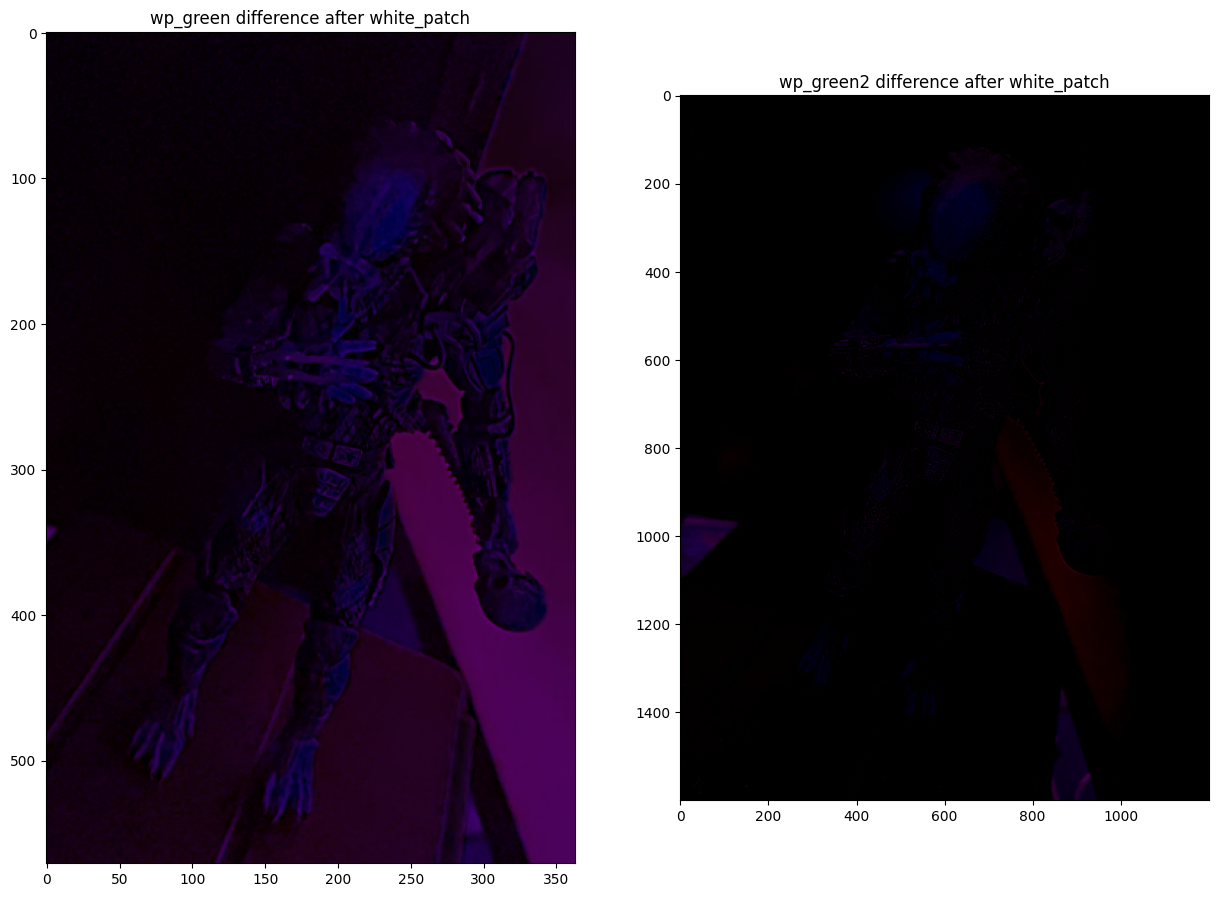

In [116]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
img = cv.imread('./TP1/white_patch/wp_green.png')
ax[0].imshow((white_patch(img) - img))
ax[0].set_title("wp_green difference after white_patch")
img = cv.imread('./TP1/white_patch/wp_green2.jpg')
ax[1].imshow((white_patch(img) - img))
ax[1].set_title("wp_green2 difference after white_patch")
fig.show()

Text(0.5, 1.0, 'img2_tp')

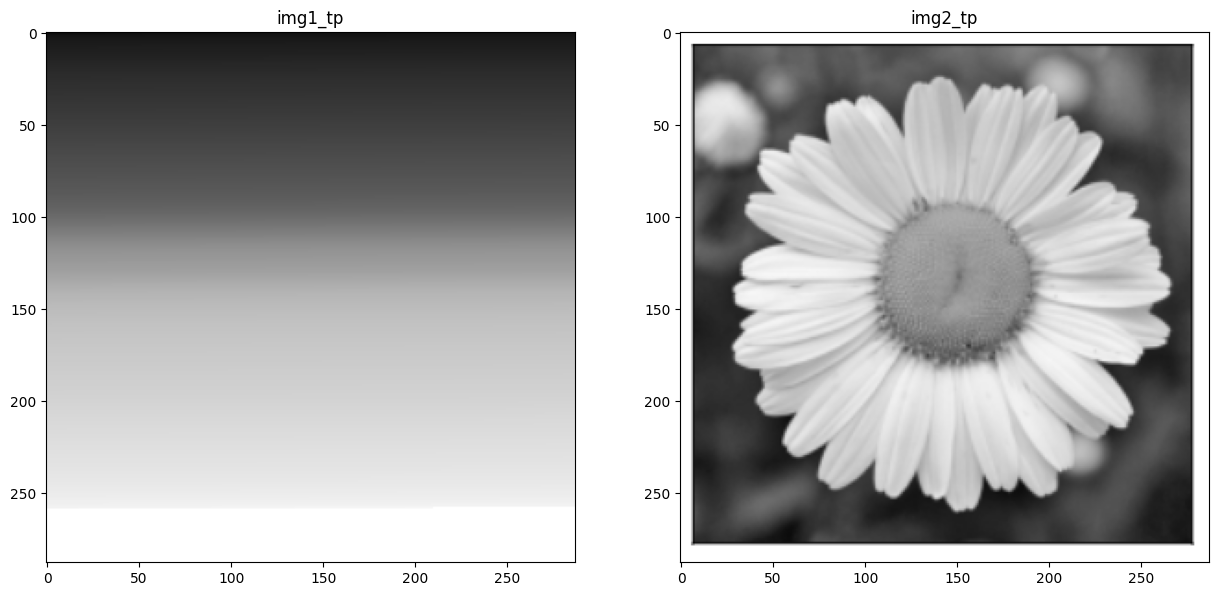

In [119]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
img = cv.imread('./TP1/img1_tp.png')
ax[0].imshow(img)
ax[0].set_title("img1_tp")
img = cv.imread('./TP1/img2_tp.png')
ax[1].imshow(img)
ax[1].set_title("img2_tp")

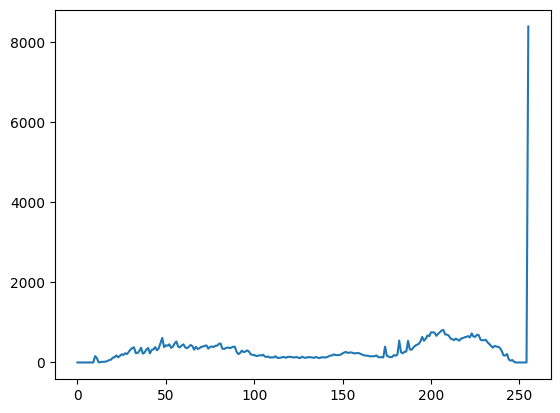

In [131]:
img = cv.imread('./TP1/img1_tp.png', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

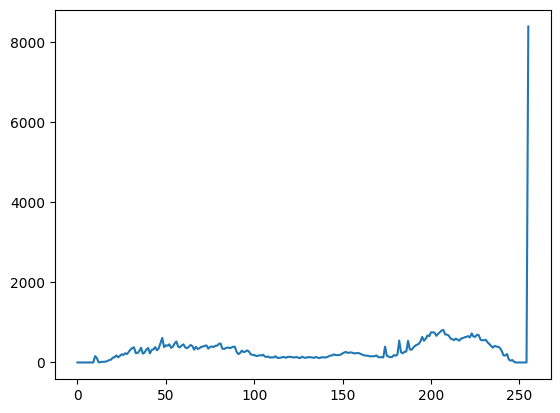

In [133]:
img = cv.imread('./TP1/img2_tp.png', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()